In [29]:
import pandas as pd

df = pd.read_csv('../data/csvs/g1_news_10000.csv')
df.head()

title           section  \
0  nova regra fiscal: governo vai arrumar a casa ...          política   
1  pl aciona conselho de ética para acusar deputa...          política   
2  sites chineses usam 3 estratégias para burlar ...          economia   
3  subsídio do governo no minha casa, minha vida ...          economia   
4  dólar em queda: saiba se é um bom momento para...  turismo e viagem   

         date                                                url  \
0  2023-04-13  https://g1.globo.com/politica/noticia/2023/04/...   
1  2023-04-13  https://g1.globo.com/politica/noticia/2023/04/...   
2  2023-04-13  https://g1.globo.com/economia/noticia/2023/04/...   
3  2023-04-13  https://g1.globo.com/economia/noticia/2023/04/...   
4  2023-04-13  https://g1.globo.com/turismo-e-viagem/noticia/...   

                                             content  
0   a ministra do planejamento e orçamento, simon...  
1   o pl apresentou nesta quinta–feira (13) ao co...  
2  o anúncio do fim da isenção de imposto para en...  
3   o governo publicou uma portaria que estabelec...  
4   na quarta–feira, a moeda estava a r$ 4,9421. ...

In [30]:
prev_size = df.shape[0]
df = df.dropna()
print(f'Dropping {prev_size - df.shape[0]} rows with NaN values')

prev_size = df.shape[0]
df = df.drop_duplicates(subset=['url'])
print(f'Dropping {prev_size - df.shape[0]} rows with duplicated values')

print(f'Final shape: {df.shape}')

Dropping 0 rows with NaN values
Dropping 0 rows with duplicated values
Final shape: (10221, 5)


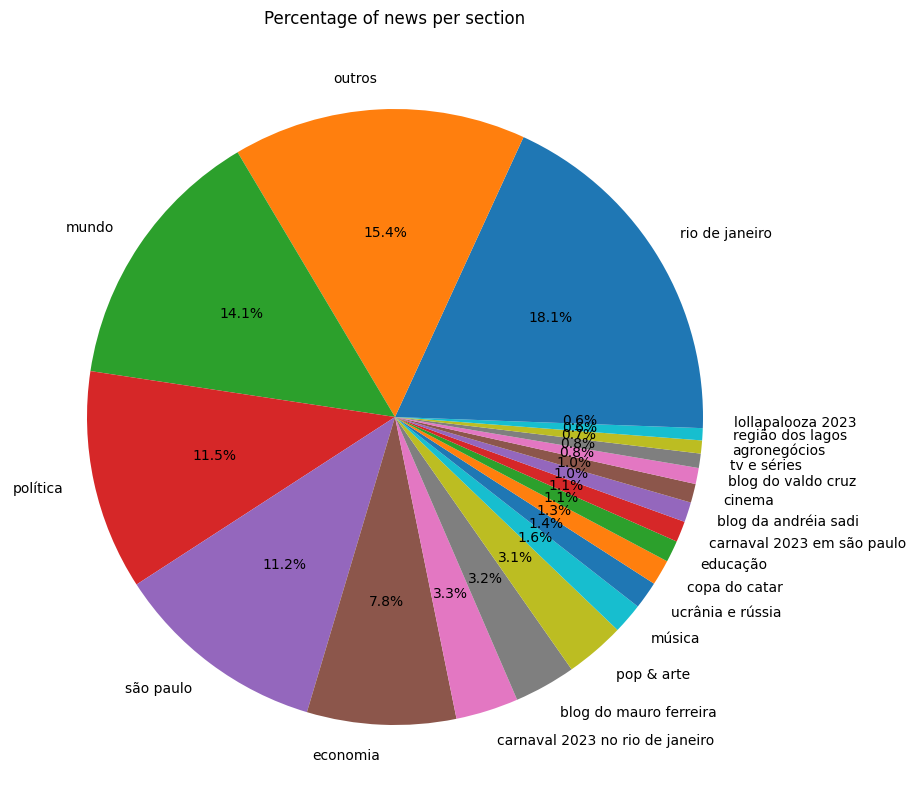

In [31]:
# Create a pie chart with the number of news per section
import matplotlib.pyplot as plt

# Join sections that have less than 1% news
freqs = df['section'].value_counts()
low_freqs = freqs[freqs < df.shape[0] * 0.005]
joined_sections = df['section'].apply(lambda x: 'outros' if x in low_freqs.index else x)

# Create a pie chart with the number of news per section
joined_sections.value_counts().plot.pie(autopct='%1.1f%%', xlabel='', ylabel='', figsize=(10, 10), title='Percentage of news per section')
plt.show()

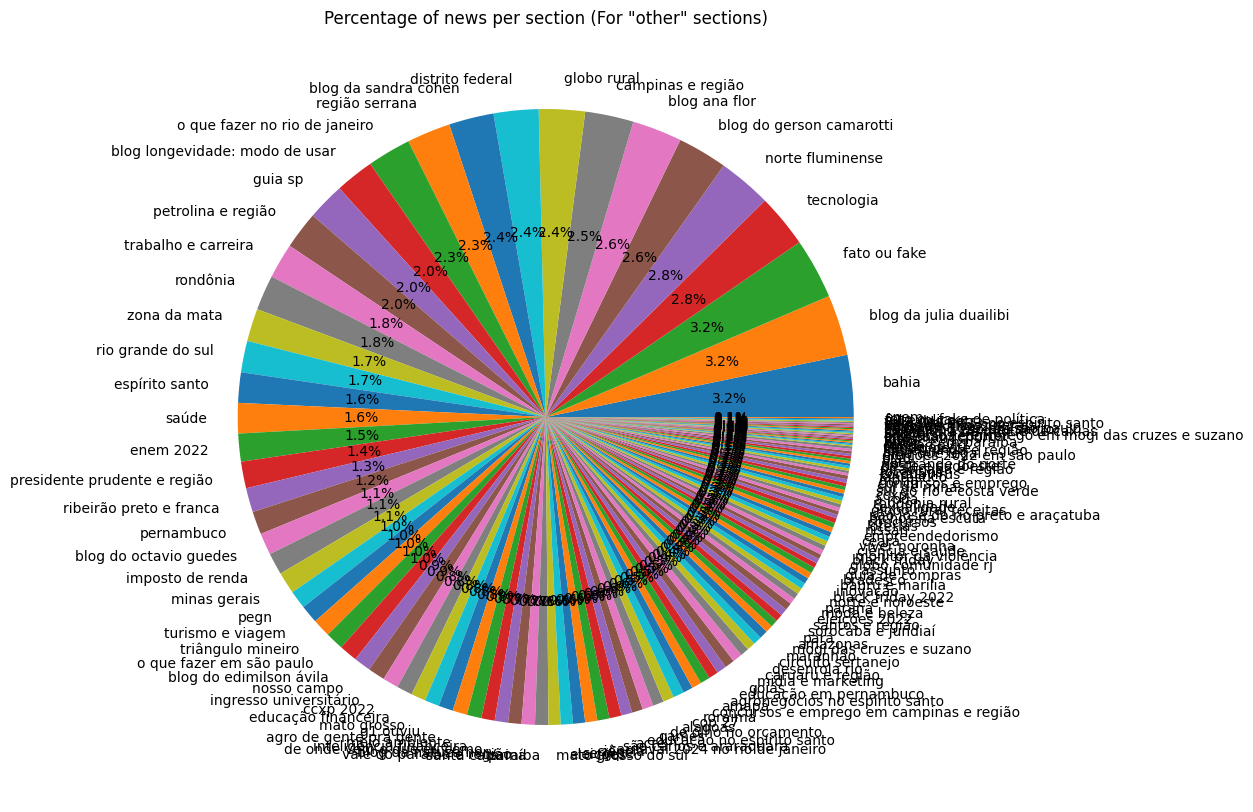

In [32]:
#print(low_freqs)
low_freqs.plot.pie(autopct='%1.1f%%', xlabel='', ylabel='', figsize=(10, 10), title='Percentage of news per section (For "other" sections)')
plt.show()

In [33]:
# Smaller region news (removing SP and RJ)
regions_other_than_sp_rj = [
    'acre', 'alagoas', 'amapá', 'amazonas', 'bahia', 'ceará', 'distrito federal', 'espírito santo', 'goiás', 'maranhão', 'mato grosso', 'mato grosso do sul', 'minas gerais', 'pará', 'paraíba', 'paraná', 'pernambuco', 'piauí', 'rio grande do norte', 'rio grande do sul', 'rondônia', 'roraima', 'santa catarina', 'sergipe', 'tocantins',
    'grande minas',
    'triângulo mineiro',
    'vales de minas gerais',
    'sul de minas',
    'oeste e sudoeste',
    'centro-oeste'
    'zona da mata',
    'norte e noroeste',
    'petrolina e região',
    'caruaru e região',
    'viver noronha',
    'rondônia rural',
]
df['section'] = df['section'].apply(lambda x: 'regional' if x in regions_other_than_sp_rj else x)

# SP
sp_news = [
    'guia sp',
    'o que fazer em são paulo',
    'bauru e marília',
    'campinas e região',
    'itapetininga e região',
    'mogi das cruzes e suzano',
    'piracicaba e região'
    'presidente prudente e região',
    'ribeirão preto e franca',
    'santos e região',
    'são carlos e araraquara',
    'são josé do rio preto e araçatuba',
    'sorocaba e jundiaí',
    'vale do paraíba e região',
    
]
df['section'] = df['section'].apply(lambda x: 'são paulo' if x in sp_news else x)

# RJ
rj_news = [
    'o que fazer no rio de janeiro',
    'desenrola rio',
    'globo comunidade rj',
    'norte fluminense',
    ' prefeitura de duque de caxias',
    'região serrana',
    'região dos lagos',
    'sul do rio e costa verde'
    
]
df['section'] = df['section'].apply(lambda x: 'rio de janeiro' if x in rj_news else x)

# Blogs
blogs = {
    'blog do mauro ferreira': 'pop & arte',
    'blog da andréia sadi': 'política',
    'blog do valdo cruz': 'política',
    'blog ana flor': 'economia',
    'blog da julia duailibi': 'política',
    'blog da sandra cohen ': 'mundo',
    'blog do gerson camarotti': 'política',
    'blog do octavio guedes': 'política',
    'blog longevidade: modo de usar': 'educação',
    'blog da natuza nery': 'política',
    'blog do edimilson ávila': 'rio de janeiro',
}
df['section'] = df['section'].apply(lambda x: blogs[x] if x in blogs else x)

# Mundo
other_mundo = ['ucrânia e rússia']
df['section'] = df['section'].apply(lambda x: 'mundo' if x in other_mundo else x)

# Política
other_politica = [
    'eleições',
    'eleições 2022',
    'eleições 2022 em são paulo',
    'cpi da covid'
]
df['section'] = df['section'].apply(lambda x: 'política' if x in other_politica else x)

# Pop & Arte
other_pop_arte = [
    'cinema',
    'música',
    'tv e séries',
    'games',
    'moda e beleza',
    'turismo e viagem',
    'lollapalooza 2023',
    'ccxp',
    'ccxp 2022',
    'circuito sertanejo',
    'música em paraíba'
    'música no espírito santo',
    'carnaval 2023 no espírito santo',
    'carnaval 2023 no rio de janeiro',
    'carnaval 2024 no rio de janeiro',
    'carnaval 2023 em são paulo',
    'carnaval 2022 em são paulo',
]
df['section'] = df['section'].apply(lambda x: 'pop & arte' if x in other_pop_arte else x)

# Economia
other_economia = [
    'negócios',
    'pequenas empresas & grandes negócios',
    'pegn',
    'empreendedorismo',
    'sicredi',
    'concursos',
    'concursos e emprego',
    'concursos e emprego em mogi das cruzes e suzano',
    'concursos e emprego em campinas e região',
    'trabalho e carreira',
    'imposto de renda',
    'black friday',
    'black friday 2022',
    'de olho no orçamento',
    'guia de compras',
    'bradesco',
    'vae',
    'pix'
]
df['section'] = df['section'].apply(lambda x: 'economia' if x in other_economia else x)

# Educação
other_educacao = [
    'ciência',
    'educação no espírito santo',
    'educação em pernambuco',
    'educação financeira',
    'inteligência financeira',
    'g1 explica',
    'enem',
    'enem 2022',
    'ingresso universitário',
]
df['section'] = df['section'].apply(lambda x: 'educação' if x in other_educacao else x)

# Saúde
other_saude = [
    'de onde vem o que eu como',
    'ciência e saúde', 
    'coronavírus',
    'glória '
]
df['section'] = df['section'].apply(lambda x: 'saúde' if x in other_saude else x)

# Agro
other_agro = [
    'agro de gente pra gente',
    'agronegócios no espírito santo',
    'estação agro',
    'nosso campo',
]
df['section'] = df['section'].apply(lambda x: 'agro' if x in other_agro else x)
df['section'] = df['section'].apply(lambda x: 'agro' if x == 'agronegócios' else x)

# Esporte
other_esporte = ['fórmula 1', 'copa do catar']
df['section'] = df['section'].apply(lambda x: 'esporte' if x in other_esporte else x)

# Meio Ambiente
other_meio_ambiente = ['cop 27', 'globo rural']
df['section'] = df['section'].apply(lambda x: 'meio ambiente' if x in other_meio_ambiente else x)

# Fato ou Fake
other_fato_fake = ['fato ou fake de política']
df['section'] = df['section'].apply(lambda x: 'fato ou fake' if x in other_fato_fake else x)

# Outros
others = [
    'a roda',
    'bichos na escuta',
    'vida dos pets',
    'fantástico',
    'fotos',
    'g1 ouviu',
    'globo rural receitas',
    'olha que legal',
    'o assunto',
    'retrospectiva 2022',
    'profissão repórter',
    'midia e marketing',
    'monitor da violência',
    'inovação ',
    'sexualidade',
    'loterias',
    'crrc changchun',
    'enel',
    'meta'
    'nissan',
    'sadia ',
    'vivo ',
]
df['section'] = df['section'].apply(lambda x: 'outros' if x in others else x)

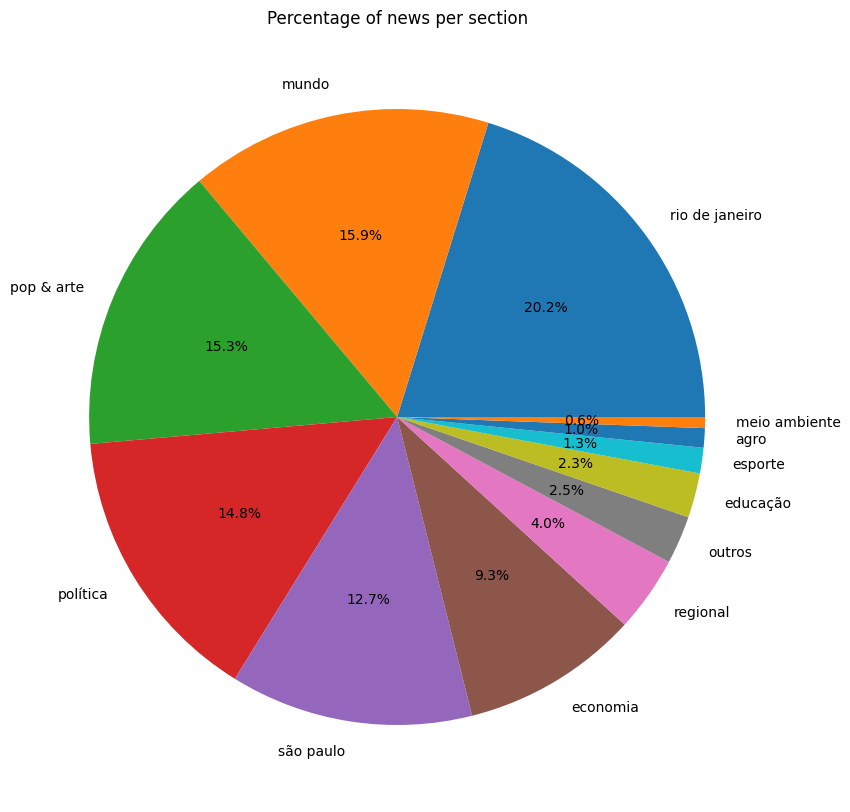

In [34]:
# Join sections that have less than 1% news
freqs = df['section'].value_counts()
low_freqs = freqs[freqs < df.shape[0] * 0.005]
joined_sections = df['section'].apply(lambda x: 'outros' if x in low_freqs.index else x)

# Create a pie chart with the number of news per section
joined_sections.value_counts().plot.pie(autopct='%1.1f%%', xlabel='', ylabel='', figsize=(10, 10), title='Percentage of news per section')
plt.show()

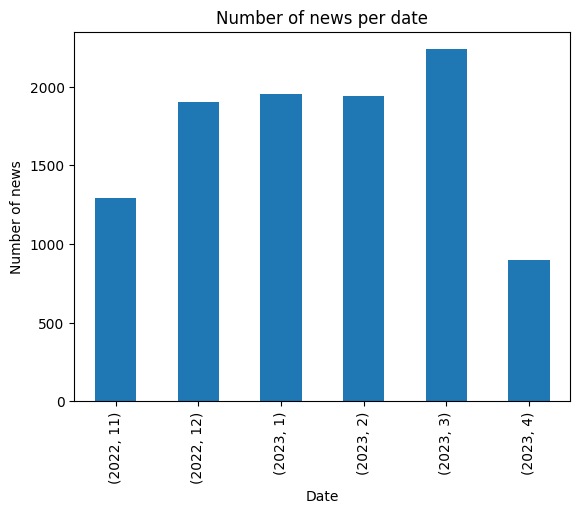

In [35]:
# Create a histogram with the number of news per date ordered by date (which are in format YYYY-MM-DD). D
df["date"] = pd.to_datetime(df["date"])
df.groupby([df["date"].dt.year, df["date"].dt.month])["date"].count().plot(kind="bar", xlabel='Date', ylabel='Number of news', title='Number of news per date')
plt.show()


In [504]:
import re
import os

def break_text_into_sentences(text: str):
    def validate_sentence(sentence: str):
        # remove sentences that end with ? or are too short
        return len(sentence) > 30 and sentence[-1] != '?'

    # split sentences by punctuation (., !, ?) and write each sentence in a new line
    sentences = []
    for sentence in re.split(r'([.!?])', text):
        if validate_sentence(sentence):
            sentences.append(sentence.strip())
    
    return sentences

def generate_tuples(texts: list):
    # Split the text in sentences
    sentences = []
    for text in texts:
        sentences.extend(break_text_into_sentences(text))
    
    # Write the sentences in a file
    test_sentence_path = 'testSentence.txt'
    with open('DptOIE/' + test_sentence_path, 'w', encoding='utf-8') as f:
        for sentence in sentences:
            f.write(sentence + '\n')

    def fix_tuple(tuple: list):
        for i in range(len(tuple)):
            # replace 'en a' with 'na' and 'en as' with 'nas', 'en o' with 'no' and 'en os' with 'nos'
            tuple[i] = re.sub(r'en (a|as|o|os)', r'n\1 ', tuple[i])

            # replace 'de o' with 'do' and 'de os' with 'dos', 'de a' with 'da' and 'de as' with 'das'
            tuple[i] = re.sub(r'de (a|as|o|os)', r'd\1 ', tuple[i])

            # replace 'R $' with 'R$'
            tuple[i] = re.sub(r'r \$', r'R\$', tuple[i])

            # replace ' ,' with ','
            tuple[i] = re.sub(r' ,', r',', tuple[i])

            # remove ',' from the end of the tuple
            tuple[i] = re.sub(r',$', '', tuple[i])

            # trim
            tuple[i] = tuple[i].strip()

            # make everything lowercase
            tuple[i] = tuple[i].lower()

        return tuple
     
    # Generate the triples with DptOIE
    string_tuples = []    
    string_tuples_lines = os.popen(f'cd DptOIE && java -jar DptOIE.jar -sentencesIN {test_sentence_path} | grep "|||"').read()
    #string_tuples_lines = os.popen(f'cd DptOIE && java -jar DptOIE.jar -SC true -appositive 1 -appositive 2 -sentencesIN {test_sentence_path} | grep "|||"').read()
    for string_tuple in string_tuples_lines.splitlines():
        string_tuples.append(fix_tuple([string.strip() for string in string_tuple.split('|||')]))

    return string_tuples


In [505]:
import numpy as np
all_content = df['content'].values
all_title = df['title'].values
all_text = np.concatenate((all_content, all_title))
    
tuples = generate_tuples(all_text)

print(f'Generated {len(tuples)} tuples.')
print(tuples[:5])
print(tuples[-5:])

SLF4J: No SLF4J providers were found.
SLF4J: Defaulting to no-operation (NOP) logger implementation
SLF4J: See http://www.slf4j.org/codes.html#noProviders for further details.


In [ ]:
# transform the tuples into a dataframe and save it to a csv file
df_tuples = pd.DataFrame(tuples, columns=['subject', 'predicate', 'object'])
df_tuples.to_csv('../data/text_files/g1_dataset/tuples.csv', index=False)


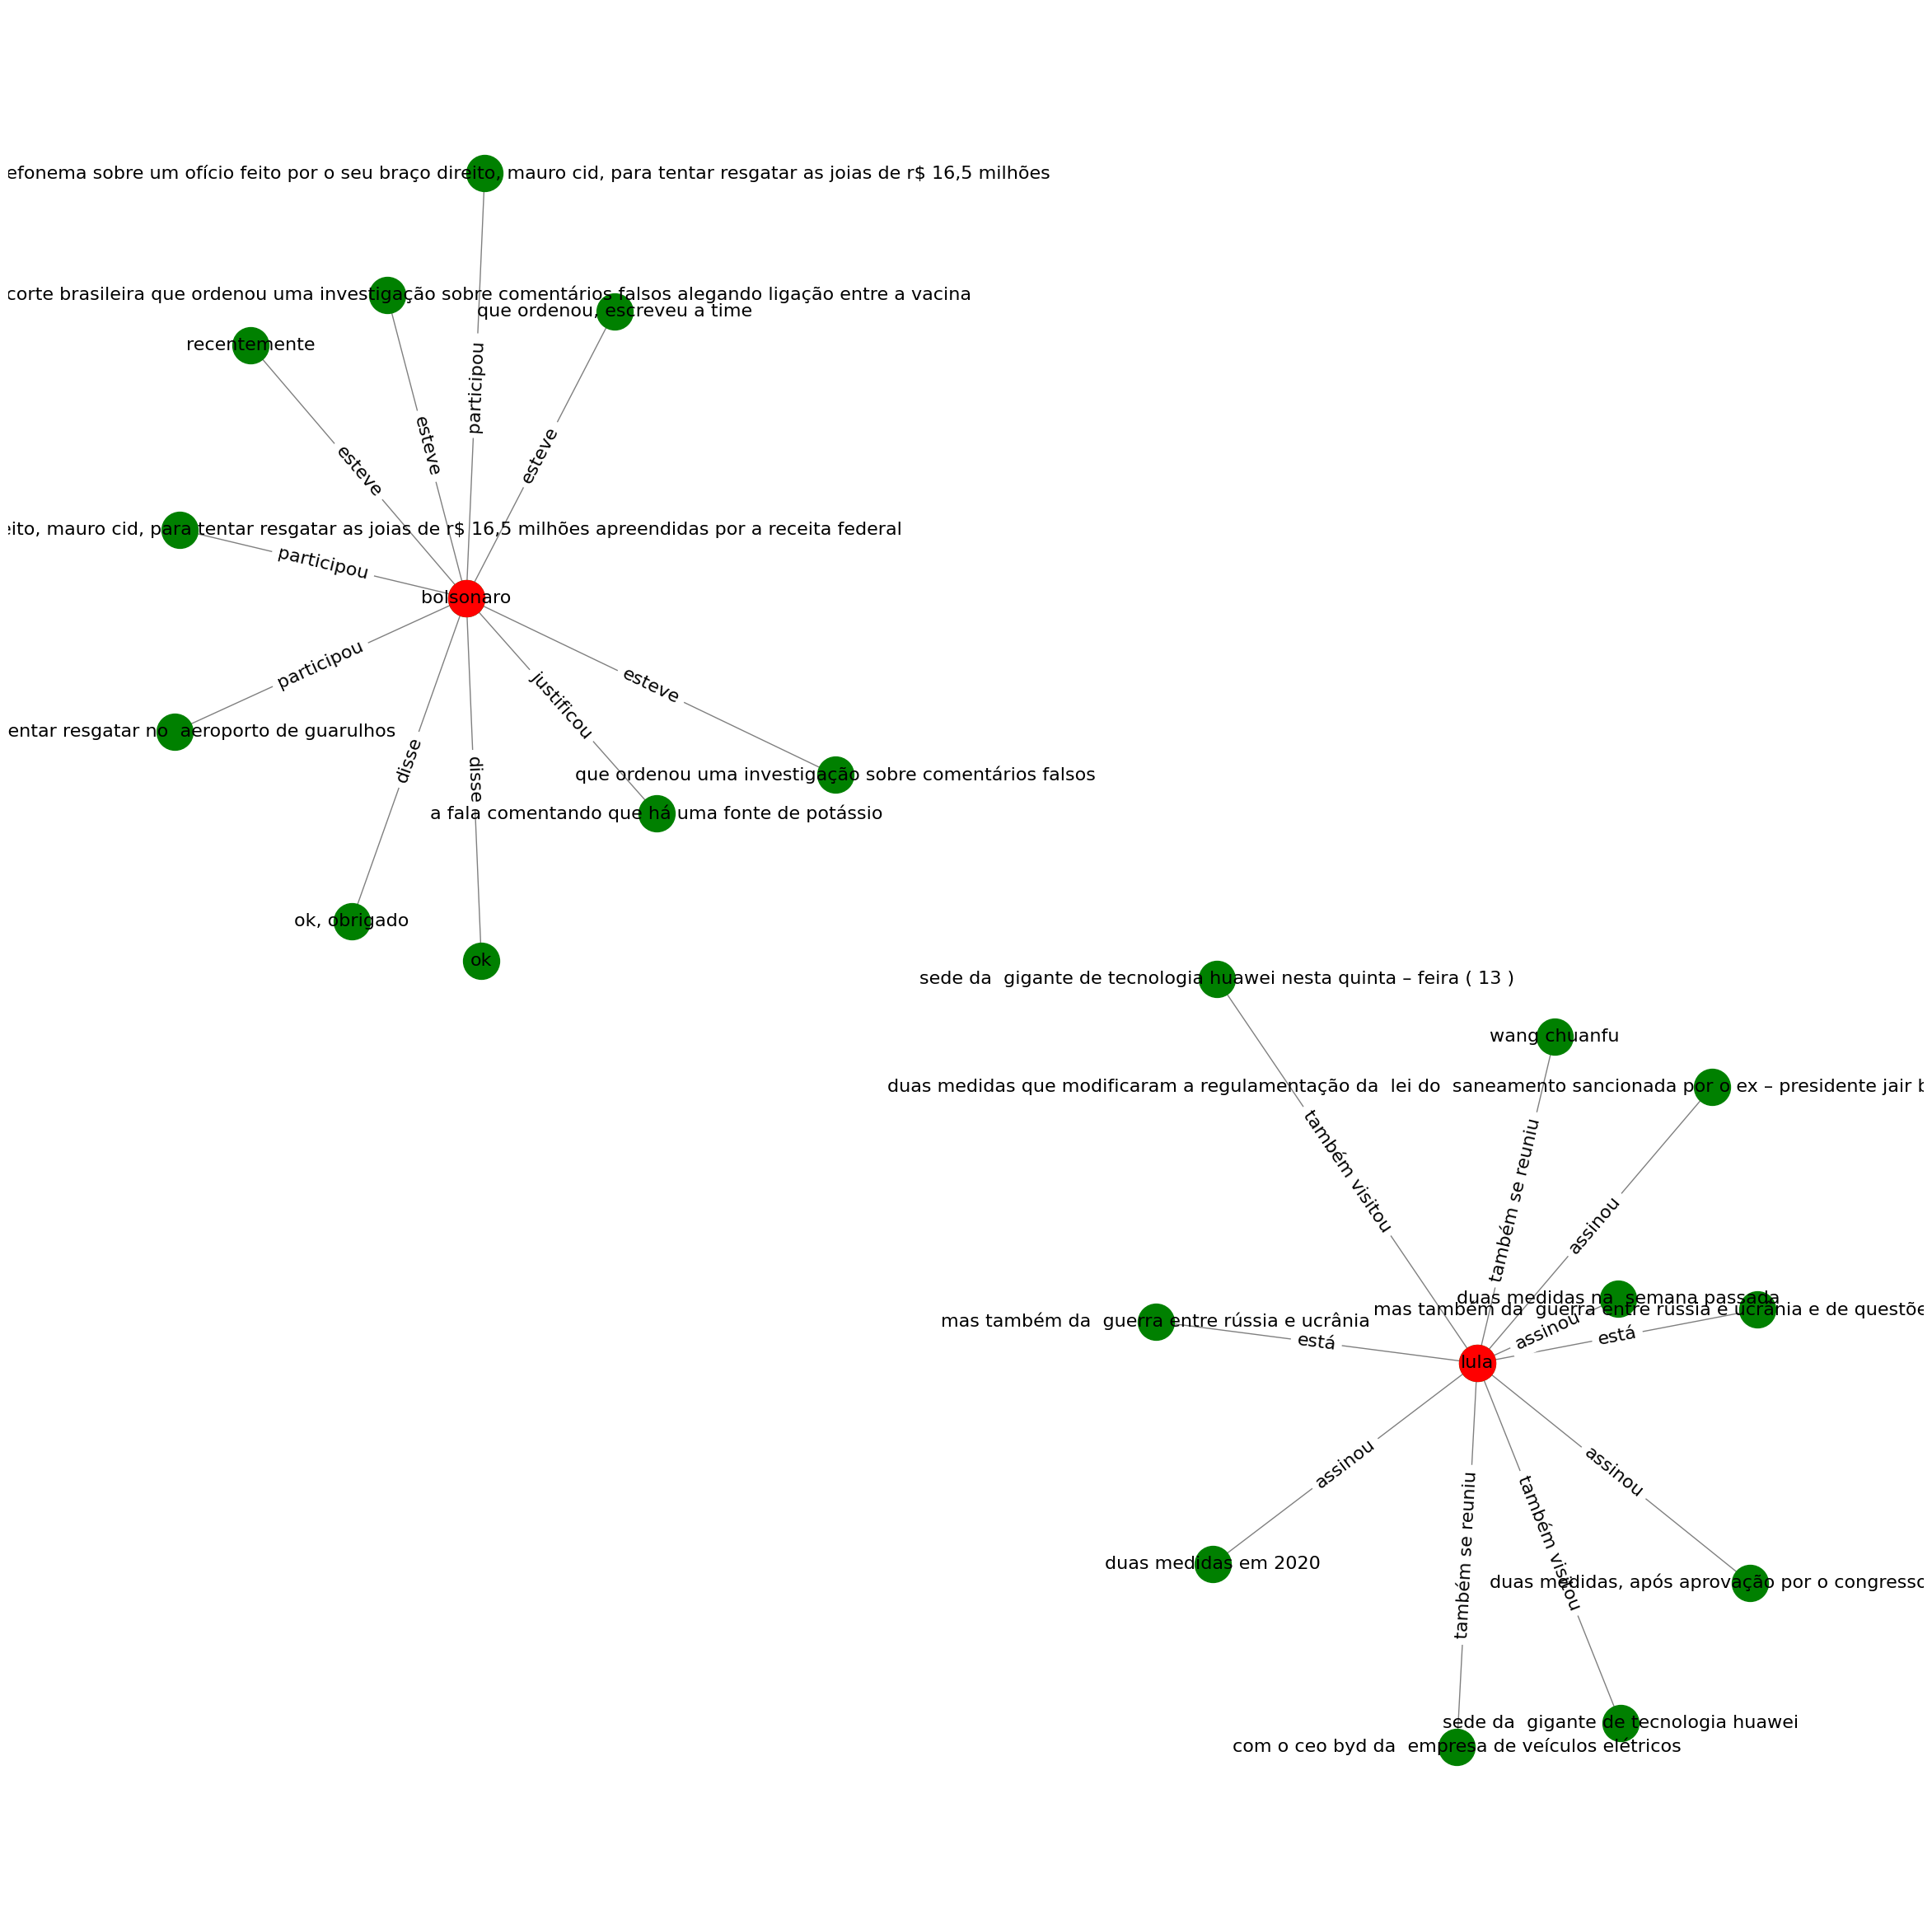

In [ ]:
# Use networkx to create a graph with the relations
import networkx as nx
import random

G = nx.Graph()
interesting_subjects = ['lula', 'bolsonaro']
number_of_objects_per_subject = [0, 0]
random.shuffle(tuples)
for tuple in tuples:
    subject = tuple[0]
    relation = tuple[1]
    object_ = tuple[2]
    if subject in interesting_subjects and number_of_objects_per_subject[interesting_subjects.index(subject)] < 10:
        G.add_edge(subject, object_, relation=relation)
        number_of_objects_per_subject[interesting_subjects.index(subject)] += 1

import matplotlib.pyplot as plt

def plot_graph(G, name, interesting_subjects = []):
    plt.figure(figsize=(30,30))
    pos = nx.spring_layout(G, k=0.5)
    nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='g')
    if len(interesting_subjects) > 0:
        nx.draw_networkx_nodes(G, pos, nodelist=[n for n in G.nodes() if n in interesting_subjects], node_size=1000, node_color='r')
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=16)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'relation'), font_size=16)

    plt.axis('off')
    plt.savefig(name + '.png', dpi=300)

plot_graph(G, 'g1_graph_lula_bolsonaro', interesting_subjects)


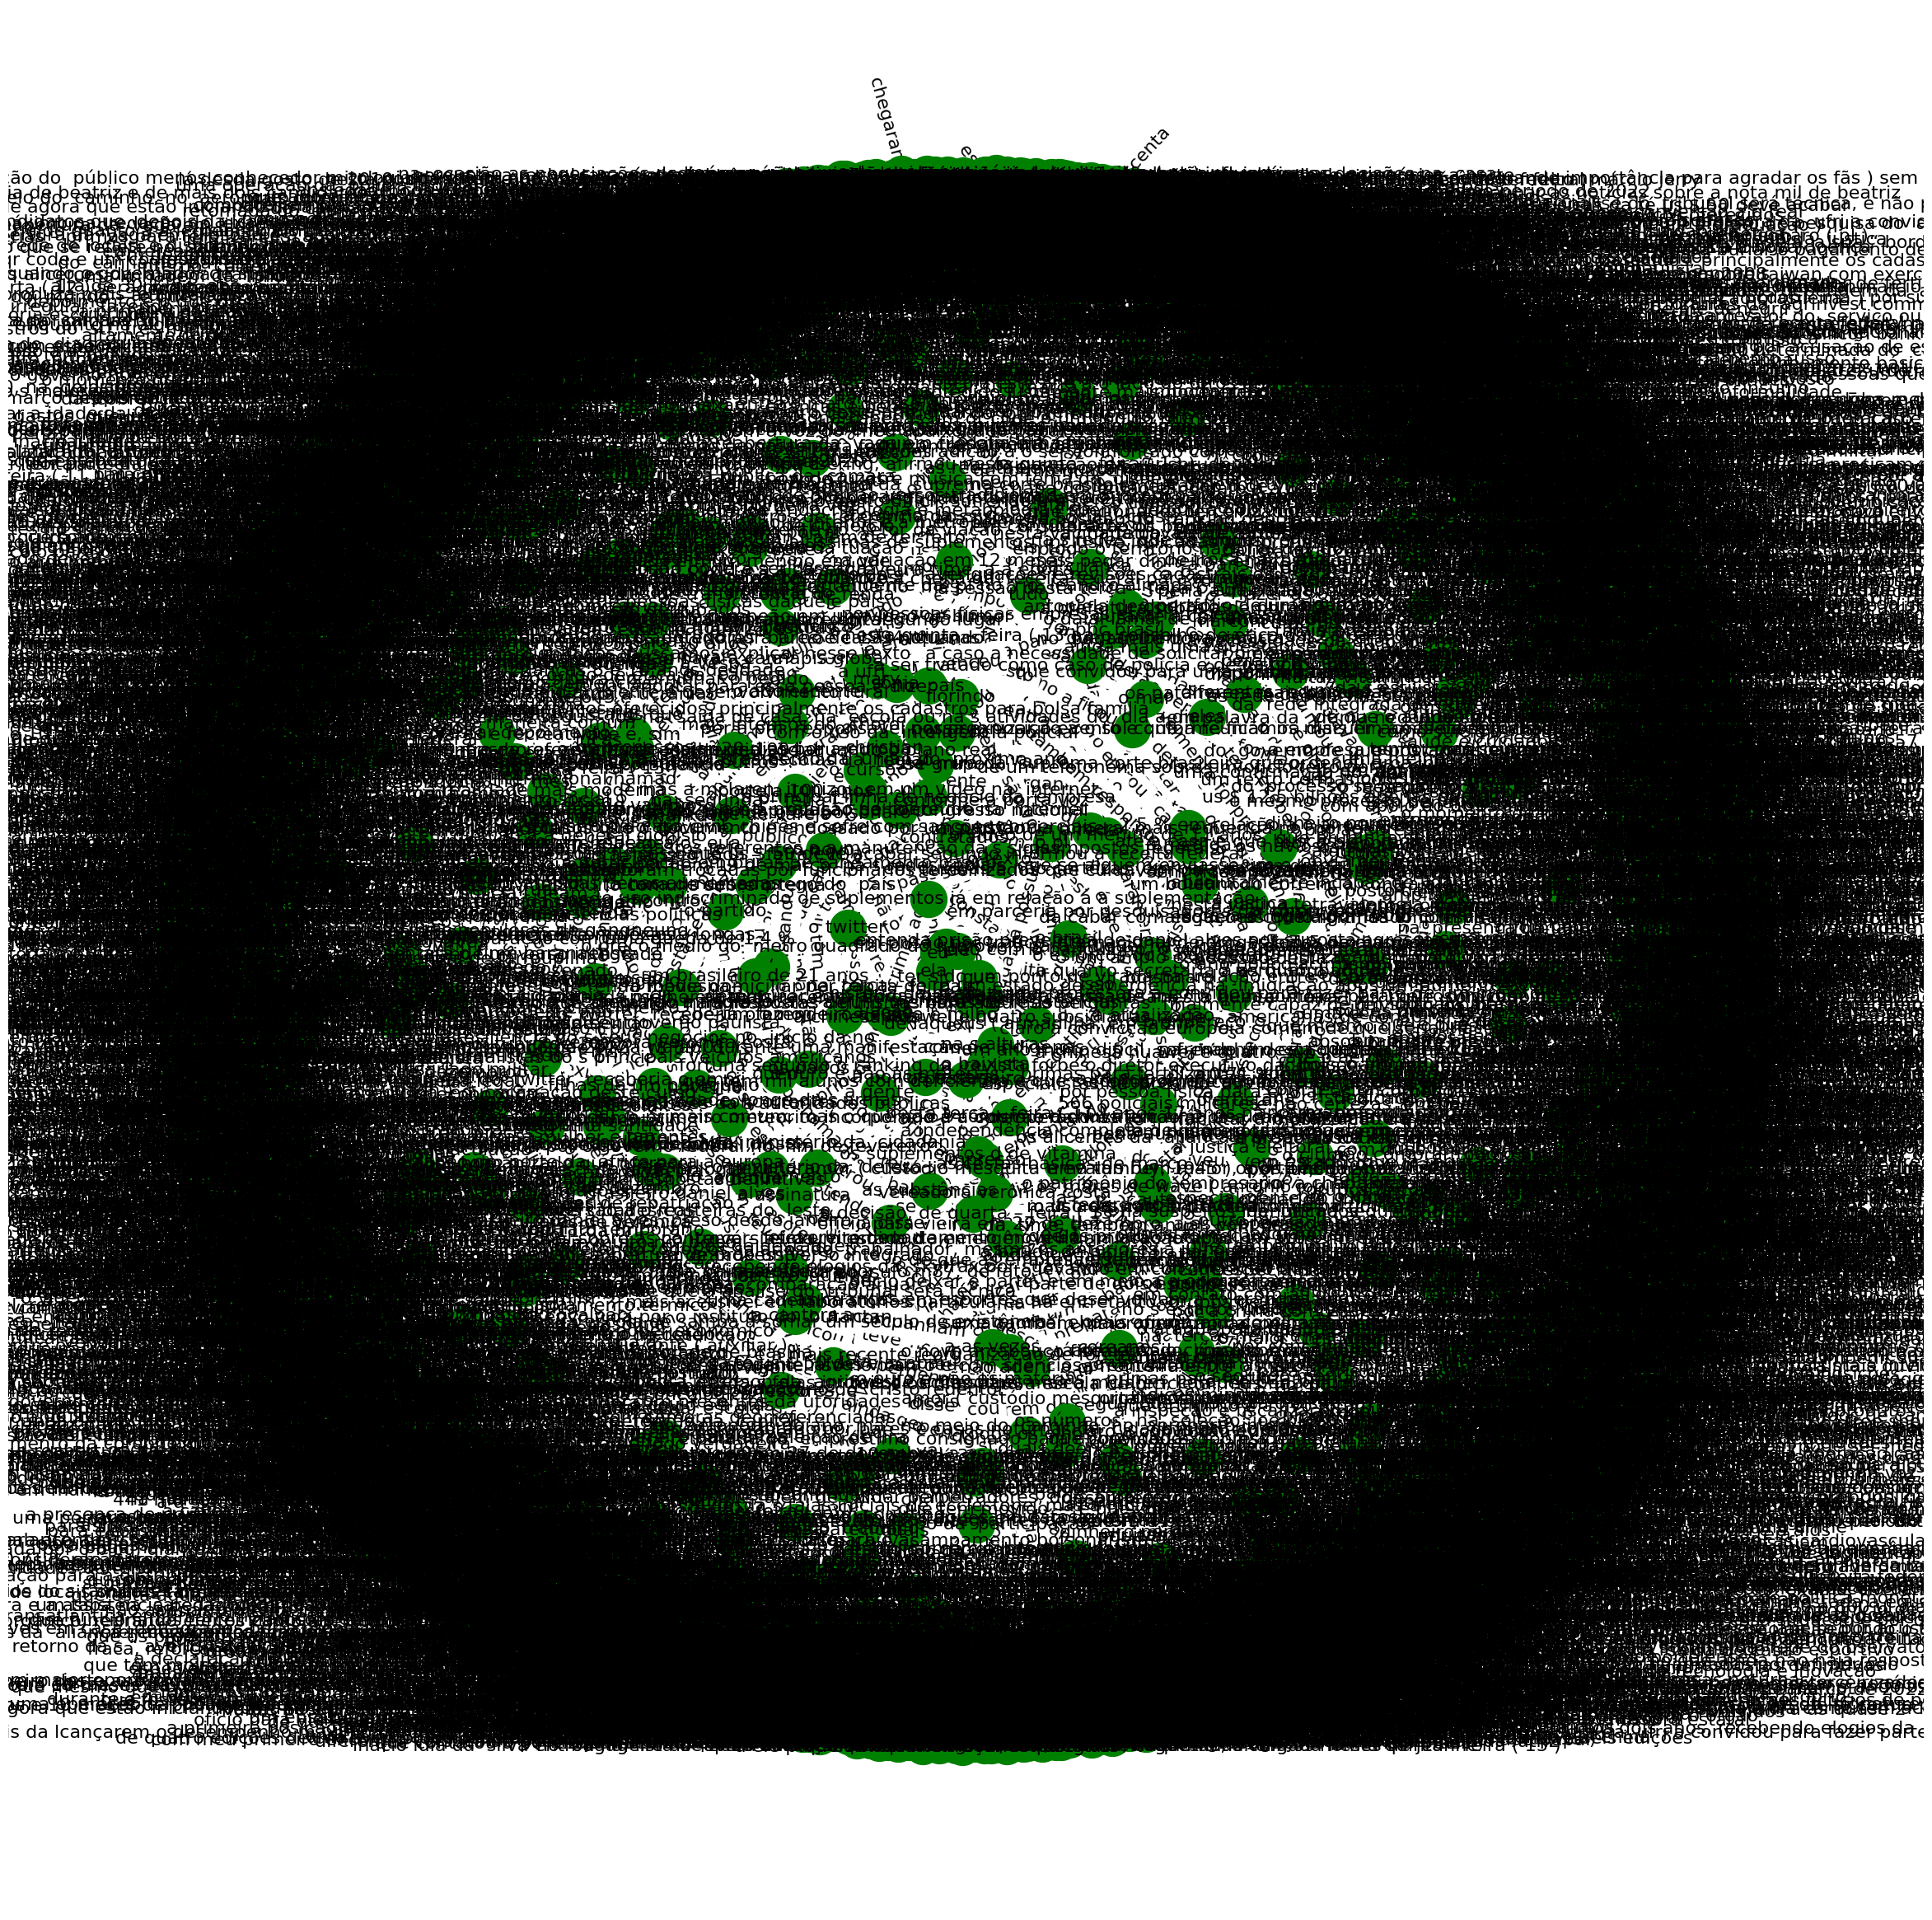

In [ ]:
# Create the final graph with all the nodes and edges
G = nx.Graph()
for string_tuple in tuples:
    subject = string_tuple[0]
    relation = string_tuple[1]
    object_ = string_tuple[2]
    G.add_edge(subject, object_, relation=relation)

plot_graph(G, 'g1_graph_all')


In [ ]:
from math import log10

def get_all_shortest_paths(G, tuples):
    all_shortest_paths = []
    for tuple in tuples:
        source = tuple[0]
        relation = tuple[1]
        target = tuple[2]
        try:
            for path in nx.all_shortest_paths(G, source=source, target=target):
                all_shortest_paths.append([path, relation])
        except:
            pass
    return all_shortest_paths

def rate_sentence(G, sentence):
    string_tuples = generate_tuples([sentence])
    all_shortest_paths = get_all_shortest_paths(G, string_tuples)

    if len(all_shortest_paths) == 0:
        return 0

    def rate_path(G, path, relation):
        if len(path) == 2:
            return 1
        
        score = 1 / (1 + sum([log10(G.degree(node)) for node in path[1:-1]]))

        # add 1 to the score if relation appers in the path
        if relation in path:
            score += 1
        
        return score
    
    return sum([rate_path(G, path, relation) for [path, relation] in all_shortest_paths])/len(all_shortest_paths)

def rate_text(G, text):
    sentences = break_text_into_sentences(text)
    return sum([rate_sentence(G, sentence) for sentence in sentences]) / len(sentences)
        

In [ ]:
sentence = "Governo de SP quer mandar moradores de rua para a casa de parentes ou para abrigos."

# for each triple, find the shortest path between the subject and the object
string_tuples = generate_tuples([sentence])
all_shortest_paths = get_all_shortest_paths(G, string_tuples)
rating = rate_sentence(G, sentence)

print(string_tuples)
print(all_shortest_paths)
print(rating)


SLF4J: No SLF4J providers were found.
SLF4J: Defaulting to no-operation (NOP) logger implementation
SLF4J: See http://www.slf4j.org/codes.html#noProviders for further details.
SLF4J: No SLF4J providers were found.
SLF4J: Defaulting to no-operation (NOP) logger implementation
SLF4J: See http://www.slf4j.org/codes.html#noProviders for further details.


[['governo de sp', 'quer', 'mandar moradores de rua'], ['governo de sp', 'quer', 'mandar moradores de rua para a casa de parentes ou para abrigos']]
[]
0
